In [28]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import blimpy as bl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


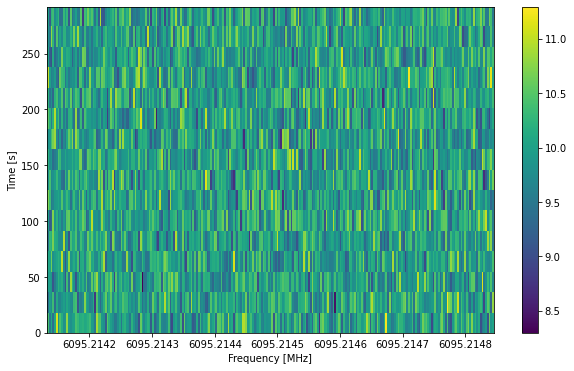

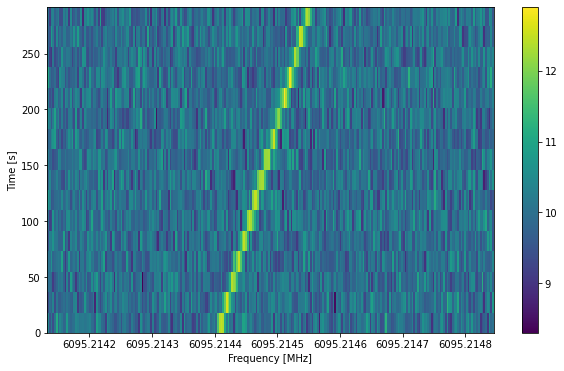

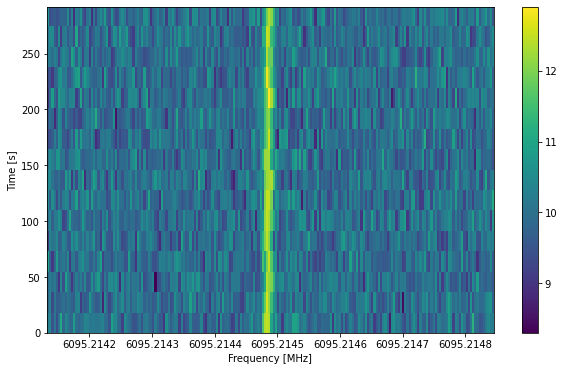

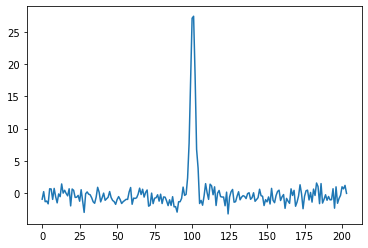

In [53]:
from astropy import units as u
import setigen as stg

frame = stg.Frame(fchans=256,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10, noise_type='chi2')

fig=plt.figure(figsize=(10,6))
frame.bl_plot()
plt.title('')
plt.savefig('setigen-s-noise.pdf', bbox_inches='tight')
plt.show()
frame.add_signal(
    stg.constant_path(
        f_start=frame.get_frequency(index=100),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=frame.get_intensity(snr=30)
    ),
    stg.gaussian_f_profile(width=10*u.Hz),
    stg.constant_bp_profile(level=1)
)

fig=plt.figure(figsize=(10,6))
frame.bl_plot()
plt.title('')
plt.savefig('setigen-s-noise+signal.pdf', bbox_inches='tight')
plt.show()

frame_dd = stg.dedrift(frame, 0.5)
fig=plt.figure(figsize=(10,6))
frame_dd.bl_plot()
plt.title('')
plt.savefig('setigen-s-noise+signal+dedrift.pdf', bbox_inches='tight')
plt.show()

spec = frame_dd.integrate()
spec -= np.mean(spec)
spec /= (frame_dd.noise_std / frame_dd.tchans**0.5)
plt.plot(spec)
plt.show()

(16, 1048576)

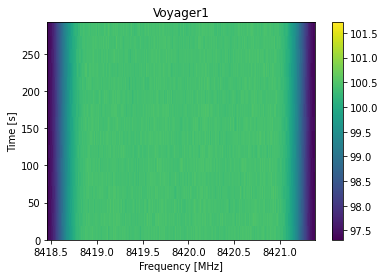

In [7]:
fr = stg.Frame('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5')
fr.bl_plot()
fr.shape

(16, 71583)


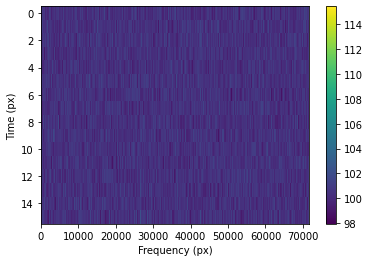

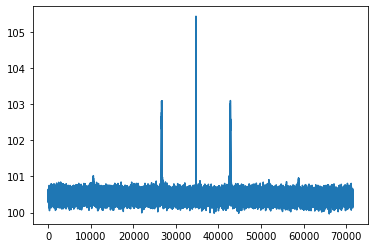

In [31]:
fr_slice = fr.get_slice(fr.get_index(8419.2*u.MHz), fr.get_index(8419.4e6))
print(fr_slice.shape)
fr_slice.plot(use_db=True)
plt.show()
plt.plot(stg.db(fr_slice.integrate()))
plt.show()

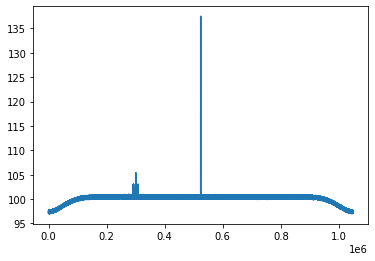

In [21]:
import matplotlib.pyplot as plt

plt.plot(stg.db(fr.integrate()))
plt.show()

(16, 31583)


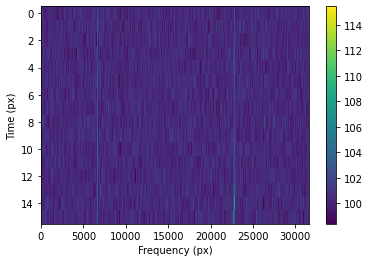

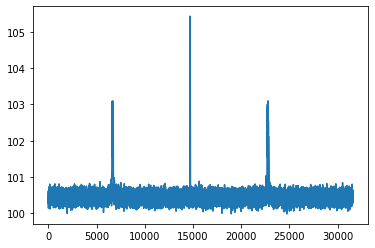

In [31]:
fr_slice = fr.get_slice(fr.get_index(8419.2*u.MHz)+20000, fr.get_index(8419.4e6)-20000)
print(fr_slice.shape)
fr_slice.plot(use_db=True)
plt.show()
plt.plot(stg.db(fr_slice.integrate()))
plt.show()

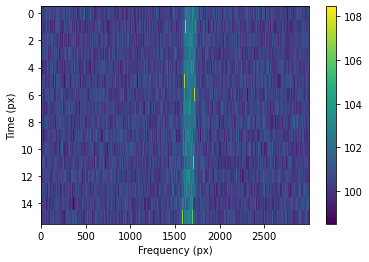

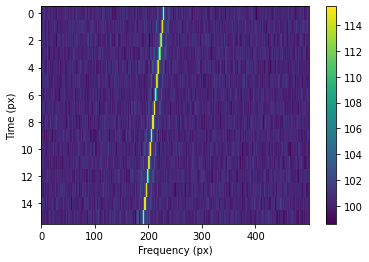

In [36]:
fr_slice.get_slice(5000, 8000).plot(use_db=True)
plt.show()
fr_slice.get_slice(14500, 15000).plot(use_db=True)
plt.show()

In [39]:
fr.df

2.7939677238464355

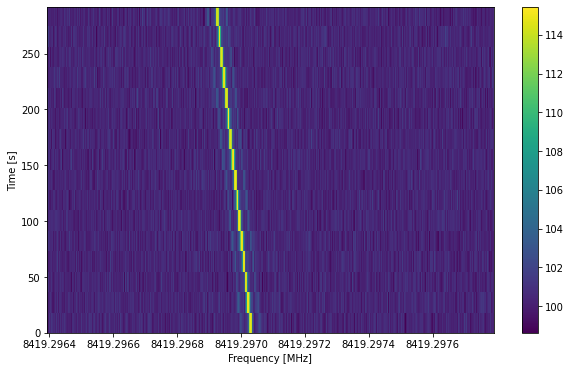

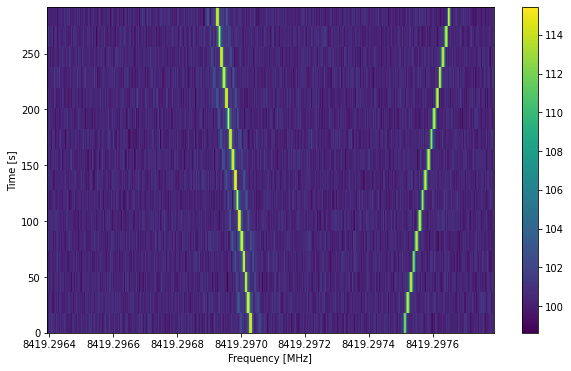

In [56]:
df = 2.7939677238464355
fr = stg.Frame(bl.Waterfall('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5',
               f_start=8419.2+34500*df/1e6,
               f_stop=8419.2+35000*df/1e6))
fig=plt.figure(figsize=(10,6))
fr.bl_plot()
plt.title('')
plt.savefig('setigen-s-voyager.pdf', bbox_inches='tight')
plt.show()

fr.add_signal(
    stg.constant_path(
        f_start=fr.get_frequency(index=400),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=fr.get_intensity(snr=1000)
    ),
    stg.gaussian_f_profile(width=2*fr.df),
    stg.constant_bp_profile(level=1)
)
fig=plt.figure(figsize=(10,6))
fr.bl_plot()
plt.title('')
plt.savefig('setigen-s-voyager+signal.pdf', bbox_inches='tight')
plt.show()

In [43]:
fr.shape

(16, 500)